# Imports

## Libraries

In [1]:
### Basic Libraries
# from datetime import datetime
# !pip install numpy
import numpy as np
# !pip install pandas
import pandas as pd

### Visualization
# !pip install matplotlib
import matplotlib.pyplot as plt
# !pip install seaborn
# import seaborn as sns
# !pip install plotly
# import plotly.express as px
# !pip install squarify
# import squarify
# from pylab import rcParams
# rcParams['figure.figsize'] = 20, 10
# !pip install nbformat>=4.2.0

### Sklearn
# !pip install scikit-learn
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import train_test_split
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score

### Functions
from utils1 import (
    plot_pie_chart, 
    plot_bar_chart, 
    plot_line_chart, 
    plot_histogram, 
    plot_correlation_matrix, 
    plot_scatter, 
    knn_imputer_best_k
)

### Warnings
import warnings
warnings.filterwarnings('ignore')

# Set the path to the data files
path = "C:\\Users\\ritaf\\Documentos\\Estudos\\NovaIMS\\Mestrado_GIBI\\DM_I\\DM_Project\\"

## Data

In [2]:
data = pd.read_excel(path + 'Data\\project_data.xlsx')

In [3]:
data.head()

,ID_Client,Frequency_items,Potencial_Score,ZIP_Code,Longevity_months,Latitude,Longitude,Credit_factor,Relevance_criteria,Store_state,...,Meat,Dairy,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines
0,10156431SEG17NKID781,38,-0.400000,0,23,0.000000,-1.666667,0.7,Priority,NSW,...,59,"88,000",148,150.0,105,27,24,27.0,10,0
1,9056576FIA11NKID679,50,-0.300000,0,24,0.200000,0.000000,0.7,Priority,NSW,...,7,"90,000",134,26.0,20,31,-12,2.0,18,2
2,9253304IST6NKID248,48,1.600000,0,32,0.428571,1.000000,0.7,Priority,NSW,...,0,"89,000",39,-6.0,25,32,17,33.0,26,-13
3,9661067PER12NKID393,46,-0.900000,0,-4,-0.400000,-0.500000,4.5,Priority,NSW,...,0,"89,000",26,66.0,16,29,31,28.0,-2,8
4,9956825FEG11NKID326,31,31.607792,8,10,1.000000,0.714286,0.7,Priority,NSW,...,0,"90,000",-2,57.0,27,45,46,19.0,23,9


In [29]:
data.columns

Index(['ID_Client', 'Frequency_items', 'Potencial_Score', 'ZIP_Code',
       'Longevity_months', 'Latitude', 'Longitude', 'Credit_factor',
       'Relevance_criteria', 'Store_state', 'Recency_in_weeks', 'Returns',
       'ID_Store_last', 'Gender', 'Flaged', 'Promotional_percentage',
       'Education', 'Checked_ok', 'Beer', 'Bottled_Water', 'Bread', 'Meat',
       'Dairy', 'Fresh_Foods', 'Frozen_Foods', 'Fruit_Beverages', 'Pastry',
       'Sodas', 'Toiletries', 'Veggies', 'Wines'],
      dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123683 entries, 0 to 123682
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Client               123354 non-null  object 
 1   Frequency_items         123683 non-null  int64  
 2   Potencial_Score         123683 non-null  float64
 3   ZIP_Code                123089 non-null  object 
 4   Longevity_months        123683 non-null  int64  
 5   Latitude                123683 non-null  float64
 6   Longitude               123683 non-null  float64
 7   Credit_factor           123683 non-null  float64
 8   Relevance_criteria      123683 non-null  object 
 9   Store_state             123683 non-null  object 
 10  Recency_in_weeks        123683 non-null  int64  
 11  Returns                 123683 non-null  int64  
 12  ID_Store_last           123683 non-null  int64  
 13  Gender                  42566 non-null   object 
 14  Flaged              

In [49]:
data['ZIP_Code'].replace('  ', np.nan, inplace=True)

In [4]:
# Check if any of the numbers after the comma in the 'Dairy' column are not zero
dairy_values = data['Dairy'].str.split(',', expand=True)
dairy_values[1] = dairy_values[1].astype(float)
if (dairy_values[1] != 0).any():
    data['Dairy'] = data['Dairy'].str.replace(',', '.').astype(float)
    print("Converted to float")
else:
    data['Dairy'] = data['Dairy'].str.replace(',000', '').astype(int)
    print("Convert to int")

Convert to int


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123683 entries, 0 to 123682
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID_Client               123354 non-null  object 
 1   Frequency_items         123683 non-null  int64  
 2   Potencial_Score         123683 non-null  float64
 3   ZIP_Code                122419 non-null  object 
 4   Longevity_months        123683 non-null  int64  
 5   Latitude                123683 non-null  float64
 6   Longitude               123683 non-null  float64
 7   Credit_factor           123683 non-null  float64
 8   Relevance_criteria      123683 non-null  object 
 9   Store_state             123683 non-null  object 
 10  Recency_in_weeks        123683 non-null  int64  
 11  Returns                 123683 non-null  int64  
 12  ID_Store_last           123683 non-null  int64  
 13  Gender                  42566 non-null   object 
 14  Flaged              

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Frequency_items,123683.0,38.261224,13.594001,1.0,29.000000,37.00000,47.000000,131.000000
Potencial_Score,123683.0,30.392316,99.673585,-1.0,0.800000,24.05884,39.701604,11481.040829
Longevity_months,123683.0,13.665354,9.881178,-12.0,6.000000,13.00000,21.000000,45.000000
Latitude,123683.0,25.249363,29.997630,-5.0,-0.166667,1.00000,60.126211,72.170287
Longitude,123683.0,6.158188,7.697199,-5.0,-0.166667,1.00000,13.971501,30.973885
Credit_factor,123683.0,0.899913,0.799920,0.0,0.700000,0.70000,1.000000,28.400000
Recency_in_weeks,123683.0,11.244706,3.799946,-4.0,9.000000,11.00000,14.000000,18.000000
Returns,123683.0,4.310972,27.629597,-87.0,0.000000,0.00000,0.000000,591.000000
ID_Store_last,123683.0,1.000000,0.000000,1.0,1.000000,1.00000,1.000000,1.000000
Flaged,123683.0,0.010373,0.101639,0.0,0.000000,0.00000,0.000000,2.000000


In [ ]:
# Replace negative values with NaN for all columns except 'Latitude' and 'Longitude'
cols_to_exclude = ['Latitude', 'Longitude']
for col in data.columns:
    if col not in cols_to_exclude:
        data[col] = data[col].apply(lambda x: np.nan if x < 0 else x)

data.head()

In [74]:
data['ID_Client'].apply(lambda x: x.isspace() if isinstance(x, str) else False).sum()

np.int64(288)

In [124]:
# Check the data type of the 'Dairy' column
print(data['Dairy'].dtype)

int64


In [140]:
d = data['ZIP_Code'].dropna()
d['ZIP_Code'].astype(int)

KeyError: 'ZIP_Code'

NaNs: 0
Dtype: int64
Dairy
30      9674
29      9656
31      9362
28      9093
32      7784
        ... 
822        1
817        1
804        1
1195       1
1160       1
Name: count, Length: 426, dtype: int64
Max:  4885
Min:  0


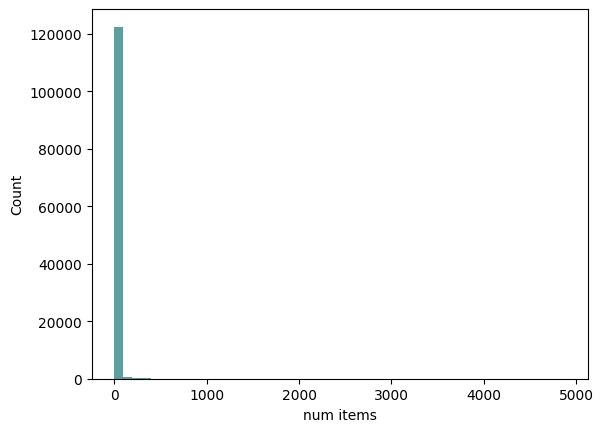

In [5]:
column = 'Dairy'
print('NaNs:', int(data[column].isna().sum()))
print('Dtype:', data[column].dtype)
print(data[column].value_counts(dropna=False))
fig, ax = plt.subplots()

if data[column].dtype == 'object':
    plot_histogram(ax, data, column, 'num items')
else:
    print('Max: ', data[column].max())
    print('Min: ', data[column].min())
    plot_histogram(ax, data, column, 'num items')


In [ ]:
data[data['ID_Client']]
data[data['ID_Client'].notnull() & (data['ID_Client'] != ' ') & data['ID_Client'].duplicated(keep=False)]

TypeError: Cannot perform 'rand_' with a dtyped [bool] array and scalar of type [bool]

In [112]:
pd.set_option('display.max_columns', None)
data[data['ID_Client'].duplicated(keep=False) & data['ID_Client'].notnull() & (data['ID_Client'] != ' ')].sort_values(by='ID_Client')

,ID_Client,Frequency_items,Potencial_Score,ZIP_Code,Longevity_months,Latitude,Longitude,Credit_factor,Relevance_criteria,Store_state,Recency_in_weeks,Returns,ID_Store_last,Gender,Flaged,Promotional_percentage,Education,Checked_ok,Beer,Bottled_Water,Bread,Meat,Dairy,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines
44135,100072GDENKID790,14,26.379735,8,27,1.250000,-2.000000,1.0,Priority,NSW,7,0,1,Female,0,16.00,High School,1,87,84,30,0,34,39,104.0,-1,38,52,4.0,29,38
44669,100072GDENKID790,4,27.679735,8,29,-0.571429,0.666667,1.0,Priority,NSW,9,0,1,NaN,0,16.00,High School,1,85,86,30,0,34,39,105.0,-1,38,27,11.0,34,38
40991,10011581SAN10NKID313,43,37.155453,8,25,57.726877,19.332201,0.7,Priority,NSW,6,0,1,NaN,0,0.00,High School,1,51,47,31,0,35,134,42.0,97,36,4,14.0,19,16
2582,10011581SAN10NKID313,45,35.355453,8,20,59.679258,17.165534,0.7,Priority,NSW,13,0,1,female,0,0.00,High School,1,51,47,31,0,92,62,42.0,18,121,2,14.0,17,61
122504,10025167ORG1NKID411,44,80.268195,8,17,59.053913,15.240168,0.7,Priority,NSW,10,0,1,Female,0,36.00,NaN,1,41,44,29,0,19,127,48.0,103,43,60,15.0,21,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18591,9968077STE13NKID371,33,38.153198,8,-3,62.896545,10.827141,0.7,Priority,NSW,14,0,1,NaN,0,0.00,NaN,1,43,35,18,0,83,41,20.0,13,28,16,23.0,12,23
33220,9968081STA8NKID591,33,79.560512,8,-1,60.853229,21.398923,0.7,Priority,NSW,12,192,1,NaN,0,0.00,NaN,1,41,45,31,0,75,3,13.0,10,110,60,7.0,-20,42
29480,9968081STA8NKID591,28,80.560512,8,10,56.853229,25.565590,0.7,Priority,NSW,10,192,1,NaN,0,0.00,NaN,1,41,45,17,0,79,3,13.0,10,30,0,17.0,-11,-7
8415,9971048feG12NKID494,18,0.900000,0,8,0.000000,-0.500000,1.0,Priority,NSW,13,0,1,NaN,0,14.29,Degree,1,44,39,30,1,86,15,33.0,7,109,21,17.0,3,47


In [ ]:
# Fill missing values with appropriate values or remove rows/columns with missing data
data.fillna({'Gender': 'Unknown', 'Education': 'Unknown'}, inplace=True)
data.dropna(subset=['ID_Client', 'ZIP_Code'], inplace=True)

df.fillna({'Gender': 'Unknown', 'Education': 'Unknown'}, inplace=True)
df.dropna(subset=['ID_Client', 'ZIP_Code'], inplace=True)

What is potential score? Pode ter valores de -1??
- há uns valores com tipo 8 casas decimais -> será que podemos arredondar?

Longevity_months -> tem valores negativos... min -12
- tem um numero limitado de números
- -12 a 45 sem alguns números pelo meio

Recency_in_weeks -> tem valores negativos... min -4

Returns -> tem valores negativos -> min -87
- vários valores negativos

ID_Store_last -> é constante, pode ser apagada

Flaged -> a maioria é zero, mas o valor máximo é 2... não devia ser um bollean? Deviam ser 0s e 1s, why the 2s?
- tem 0, 1 e 2
- só tem 4 2s, top

Promotional_percentage -> tem valores negativos e modularmente maiores que 100... sendo que é uma percentagem, something wrong isn't right
- vários valores negativos

Checked_ok -> tb é constante, pode ser apagada

Bread, Meat, Fresh_Foods, Frozen_Foods, Fruit_Beverages, Sodas, Toiletries, Veggies, Wines -> tem valores negativos... awhy?



ZIP_Code não devia ser numero? Also, tem nulls
- uma mess
- tem '  '
- números de 0 a 8, mas não há 3... pode ser que seja o '  '

Relevance_criteria
- tem 3 valores 'Priority', 'Caution', 'Unknown'
- temos de ver do Unknown

Store_state
- só tem 1 valor -> 'NSW'

Gender has nulls... ver os outros valores
- claro que tem valores deficientes
- 'female', nan, 'male', 'Female', '    ', 'm', 'mm', 'j'

education has nulls
- tem nan e ' '
- 'Bachelor Degree', 'High School', nan, 'MSc Degree', 'Degree', ' ', 'High School '
- Tirar o espaço do fim de 'High School '

dairy is an object... should be int
- acho que todos acabam em ,000 ptt é só meter em int

frozen_foods is a float and has nulls... should be int
- tb acho que todos acabam em ,0 ptt é meter em int

toiletries is float, should be int
- tb acho que todos acabam em ,0 ptt é meter em int


In [13]:
data.drop(columns=['Store_state', 'ID_Store_last', 'Checked_ok'], inplace = True)

In [18]:
data

,ID_Client,Frequency_items,Potencial_Score,ZIP_Code,Longevity_months,Latitude,Longitude,Credit_factor,Relevance_criteria,Store_state,...,Meat,Dairy,Fresh_Foods,Frozen_Foods,Fruit_Beverages,Pastry,Sodas,Toiletries,Veggies,Wines
0,10156431SEG17NKID781,38,-0.400000,0,23,0.000000,-1.666667,0.7,Priority,NSW,...,59,"88,000",148,150.0,105,27,24,27.0,10,0
1,9056576FIA11NKID679,50,-0.300000,0,24,0.200000,0.000000,0.7,Priority,NSW,...,7,"90,000",134,26.0,20,31,-12,2.0,18,2
2,9253304IST6NKID248,48,1.600000,0,32,0.428571,1.000000,0.7,Priority,NSW,...,0,"89,000",39,-6.0,25,32,17,33.0,26,-13
3,9661067PER12NKID393,46,-0.900000,0,-4,-0.400000,-0.500000,4.5,Priority,NSW,...,0,"89,000",26,66.0,16,29,31,28.0,-2,8
4,9956825FEG11NKID326,31,31.607792,8,10,1.000000,0.714286,0.7,Priority,NSW,...,0,"90,000",-2,57.0,27,45,46,19.0,23,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123678,9858426mGE8NKID484,33,79.604090,4,21,58.698146,17.428185,0.7,Priority,NSW,...,0,"0,000",0,0.0,0,0,0,0.0,0,0
123679,9869176MÓR4NKID483,37,0.300000,0,-5,4.000000,-0.800000,0.7,Priority,NSW,...,0,"0,000",0,0.0,0,0,0,0.0,0,0
123680,992916PER8NKID237,43,79.171572,8,11,60.652785,20.731272,0.7,Priority,NSW,...,0,"0,000",0,0.0,0,0,0,0.0,0,0
123681,994681RNA13NKID439,75,33.309170,8,31,57.199647,14.395124,0.7,Priority,NSW,...,0,"0,000",0,0.0,0,0,0,0.0,0,0


In [23]:
df = data[data.duplicated(subset=['ID_Client'])].sort_values(by='ID_Client')

In [24]:
df['ID_Client'].value_counts()

ID_Client
                        287
9971048feG12NKID494       1
100072GDENKID790          1
10011581SAN10NKID313      1
10025167ORG1NKID411       1
                       ... 
10064176DIO8NKID807       1
10068135AGS7NKID832       1
100689CAR8NKID537         1
10071032feG10NKID291      1
1005271ST.17NKID831       1
Name: count, Length: 265, dtype: int64

In [25]:
data['ID_Client'].value_counts()

ID_Client
                       288
9362873STE15NKID643      2
9962222NOG15NKID525      2
9813040FEG11NKID505      2
9954179FEG14NKID274      2
                      ... 
9443884LEN9NKID746       1
9462468C-L11NKID501      1
9523398LCA11NKID714      1
9532017DRI4NKID449       1
8961998SQU5NKID751       1
Name: count, Length: 122803, dtype: int64